reporte 7:
Ariana Sato Flores 20192304

Lectura:


El artículo Los efectos de la exposición a barrios/vecindad mejores en los niños tiene como objetivo explicar cómo la ayuda a familias de bajos recursos para trasladarse a un lugar mejor donde vivir, puede tener un efecto significativo en la asistencia educativa de los niños y jóvenes de dichas familias.

Tras el avance del paper, encontramos algunas fortalezas como el uso de evidencias tras haber propuesto hipótesis en la data MTO.Los autores buscan darle consitencia a las hipótesis mediante data real y proporcionarnos un buen contexto acerca de las familias y las tasas de pobreza dentro del proyecto MTO.Además, encontramos muchos indicadores en la data que nos ayuda a saber todas las dificultades con las que se estudiaron a estas familias.Sin embargo, encuentro como debilidad dentro del artículo, que esta misma data es tomada en una muestra grande y de gran cantidad de niños, los cuales los resultados pueden verse afectados por las perspectivas subjetivas dentro del estudio, pues por la edad de los niños parece que se requería de más atención en su impresión por las mudanzas sometidas.

El artículo cuenta con resultados muy contribuyentes para ser usados. En primer lugar, se demuestra que existen efectos positivos en los niños que se mudaron a un lugar mejor, ya que en cierta edad se observan mejorar en sus ganancias económicas.Considero ello importante porque se puede tomar de ejemplo para brindar ayuda en una mejora de calidad de vida a las personas en situación de pobreza extrema que viven en condiciones precarias. De esta manera, en un futuro la tasa de pobreza podría ser más baja.

Finalmente, autores como Bailey(2017) sostienen que existe inequidad en los EEUU en cuanto vivienda,educación y salud, por lo que el gobierno sugiere intervenciones. Además Schwartz (2021) concuerda en que existe una importancia en la vivienda que mantiene influencia en el escenario de vida de las personas y en el caso de los niños, este es el refugio de espacio privado en donde se ejercen valores t la riqueza personal.

*1.Ploteo de Histogramas*

In [4]:
!pip install plotnine

In [12]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import pylab as plt
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [14]:
# creado una columna extra para clasificar
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #create a new variable
 ))) #group by the new variable (treatments)

In [16]:
data_2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


Usando la data sobre el aprendizaje online durante la pandemia y sus efectos sobre el desarrollo académicos de los estudiantes, se requiere manejar una comparación dentro de los grupos.Vamosa estimar el efecto causal al calcular la puntuación media de cada uno de los grupos de tratamiento.

In [17]:
pd.get_dummies(data_2,columns=["class_format"]).head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1


Text(19.309791666666662, 0.5, 'EstudianteS')

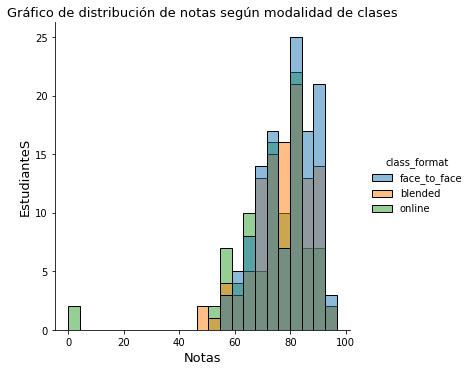

In [20]:
sns.displot(data_2, x="falsexam", hue= "class_format")
plt.title("Gráfico de distribución de notas según modalidad de clases", fontsize=13)
plt.xlabel("Notas", fontsize=13)
plt.ylabel("EstudianteS", fontsize=13)

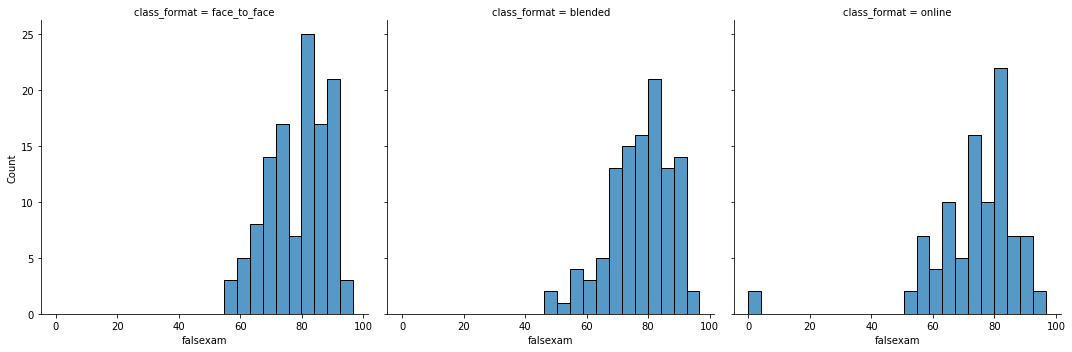

In [22]:
sns.displot(data=data_2, x="falsexam", col="class_format")


In [ ]:
Podemos obersvar las diferencias mediante los gráficos, los cuales se interpreta que en la modalidad de clases
en línea existen notas más bajas a diferencia de las clases presenciales y a las clases mixtas.Además, notamos que 
el rendimiento del alumno en ambas modalidades no es la misma.

2.Estimador de diferencia de medias

In [28]:
DIM=data_2[['class_format','falsexam']]
DIM.head(11)

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
2,blended,83.37000
3,blended,90.01994
4,online,83.30000
5,online,88.34996
6,blended,78.40000
7,face_to_face,90.00000
8,face_to_face,88.31000
9,online,73.37000


In [32]:
Dividir= ["face_to_face","online"]
VAMP= VAM[VAM['class_format'].isin(Dividir)]
VAMP

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
4,online,83.30000
5,online,88.34996
7,face_to_face,90.00000
...,...,...
316,face_to_face,91.65000
317,face_to_face,84.99000
319,online,70.05000
320,online,66.69000


In [ ]:
#Calculo el promedio de notas

In [35]:
VAMP.groupby(["class_format"]).mean ()

,falsexam
class_format,
face_to_face,78.547485
online,73.635263


In [36]:
Diferencia_medias=  78.547485-73.635263
Diferencia_medias

4.912222

Al observar la media (78,55) de las clases presenciales podemos decir que son de mayor preferencia por los estudiantes.
A comparación de la media de 73.64 de las clases online.




*Estimador de diferencia de medias mediante regresión lineal*

In [44]:
data_2 = DIM
data_2['Dummy'] = data_2['class_format']
data_2.Dummy=data_2.Dummy.replace({"face_to_face":0, "online":1 })
data_2

C:\Users\Ariana\AppData\Local\Temp\ipykernel_14548\2296832310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ariana\AppData\Local\Temp\ipykernel_14548\2296832310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,class_format,falsexam,Dummy
0,face_to_face,63.29997,0
1,face_to_face,79.96000,0
2,blended,83.37000,blended
3,blended,90.01994,blended
4,online,83.30000,1
...,...,...,...
318,blended,68.36000,blended
319,online,70.05000,1
320,online,66.69000,1
321,online,83.29997,1


In [46]:
ols_reg=sm.OLS.from_formula("falsexam~class_format", data= VAMP).fit()
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        16:41:56   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 78.5475      1.113     70.563      0.000      76.353      80.742
class_format[T.online]    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El valor de beta_1 se confirma, siendo este el promedio del efecto tratamiento medio y a la vez este será igual a la diferencia de medias = 4.91.
El p-value es menor a 0.05 en donde se visualiza una correlación significativa, sin embargo, el R2 ajustado muestra un valor menor, por lo indica que el 
modelo creado no tiene mucho valor predictivo.
